In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [4]:
df = pd.read_csv("country-gdp-timeseries.csv")
df.head(100)

,Country,Continent,Year,GDP_per_capita,life_expectancy,Population
0,Afghanistan,Asia,1950,757,26.674,8151455
1,Afghanistan,Asia,1951,767,26.932,8276820
2,Afghanistan,Asia,1952,779,27.448,8407148
3,Afghanistan,Asia,1953,813,27.964,8542906
4,Afghanistan,Asia,1954,815,28.480,8684494
5,Afghanistan,Asia,1955,816,28.995,8832253
6,Afghanistan,Asia,1956,837,29.511,8986449
7,Afghanistan,Asia,1957,821,30.027,9147286
8,Afghanistan,Asia,1958,850,30.543,9314915
9,Afghanistan,Asia,1959,856,31.059,9489453


In [26]:
df[df['Country'].str.contains('Hong Kong')]

,Country,Continent,Year,GDP_per_capita,life_expectancy,Population
4536,"Hong Kong, China",Asia,1950,2850,62.121,1973998
4537,"Hong Kong, China",Asia,1951,2949,62.378,2036119
4538,"Hong Kong, China",Asia,1952,3054,62.898,2133544
4539,"Hong Kong, China",Asia,1953,3160,63.432,2249255
4540,"Hong Kong, China",Asia,1954,3271,63.979,2370729
4541,"Hong Kong, China",Asia,1955,3386,64.540,2489955
4542,"Hong Kong, China",Asia,1956,3507,65.112,2603651
4543,"Hong Kong, China",Asia,1957,3629,65.694,2713041
4544,"Hong Kong, China",Asia,1958,3757,66.283,2823161
4545,"Hong Kong, China",Asia,1959,3889,66.870,2941712


In [5]:
df_asia = df[df['Continent'].str.contains('Asia')]
df_europe = df[df['Continent'].str.contains('Europe')]
df_africa = df[df['Continent'].str.contains('Africa')]
df_na = df[df['Continent'].str.contains('N. America')]
df_sa = df[df['Continent'].str.contains('S. America')]
df_oceania = df[df['Continent'].str.contains('Oceania')]

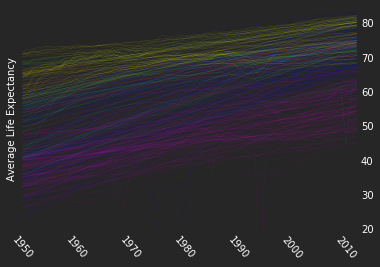

In [6]:
fig, ax = plt.subplots(facecolor='0.15')
ax = df_asia.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8)

df_oceania.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8)
df_sa.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8)
df_na.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8)
df_africa.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8)
df_europe.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8)


#ax.lines[0].set_linewidth(2)         # set linewidth to 2
#ax.lines[0].set_linestyle('dashed')  # other options: 'solid', 'dashdot` or `dotted`
#ax.lines[0].set_alpha(0.5)           # Change the transparency
#ax.lines[0].set_marker('o')          # Add a circle marker at each data point
#ax.lines[0].set_markersize(2)        # change the marker size. an alias is set_ms()
#ax.lines[0].set_markerfacecolor      # or set_mfc()
#ax.lines[0].set_markeredgecolor      # or set_mec()

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.set_ylim((20, 85))
ax.set_ylabel("Average Life Expectancy")
ax.set_xlabel(" ")
ax.set_axis_bgcolor("0.15")
ax.set_clip_on(False)
plt.xticks(rotation=-50)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both',
                top='off',
                left='off', 
                right='off',  
                bottom='off',
                labelleft=False,
                labelright=True) 


In [109]:
fig.savefig("life_black.pdf", facecolor=fig.get_facecolor(), transparent=True)

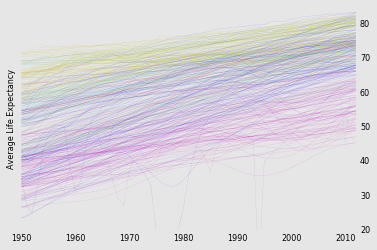

In [15]:
fig, ax = plt.subplots(facecolor='0.9')
ax = df_asia.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8)
df_oceania.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8)
df_sa.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8)
df_na.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8)
df_africa.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8)
df_europe.plot(y='life_expectancy', x='Year', ax=ax, legend=False, linewidth=.07, alpha=.8,)

#ax.lines[0].set_linewidth(.1)         # set linewidth to 2
#ax.lines[0].set_linestyle('dashed')  # other options: 'solid', 'dashdot` or `dotted`
#ax.lines[0].set_alpha(1)           # Change the transparency
#ax.lines[0].set_marker('o')          # Add a circle marker at each data point
#ax.lines[0].set_markersize(2)        # change the marker size. an alias is set_ms()
#ax.lines[0].set_markerfacecolor      # or set_mfc()
#ax.lines[0].set_markeredgecolor      # or set_mec()

ax.set_ylim((20, 85))
ax.set_ylabel("Average Life Expectancy")
ax.set_xlabel(" ")
ax.set_axis_bgcolor("0.9")
ax.set_clip_on(False)
#plt.xticks(rotation=-50)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both',
                top='off',
                left='off', 
                right='off',  
                bottom='off',
                labelleft=False,
                labelright=True) 

plt.rcParams['font.size'] = 8

In [13]:
fig.savefig("life_gray.pdf", facecolor=fig.get_facecolor(), transparent=True)